In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df_telephone =pd.read_csv("telephone.csv", index_col="date_appel", parse_dates=True)

In [4]:
df_telephone["nombre_entrants_corrige"]  = df_telephone["nombre_entrants_corrige"].str.replace(',','.').astype(float)

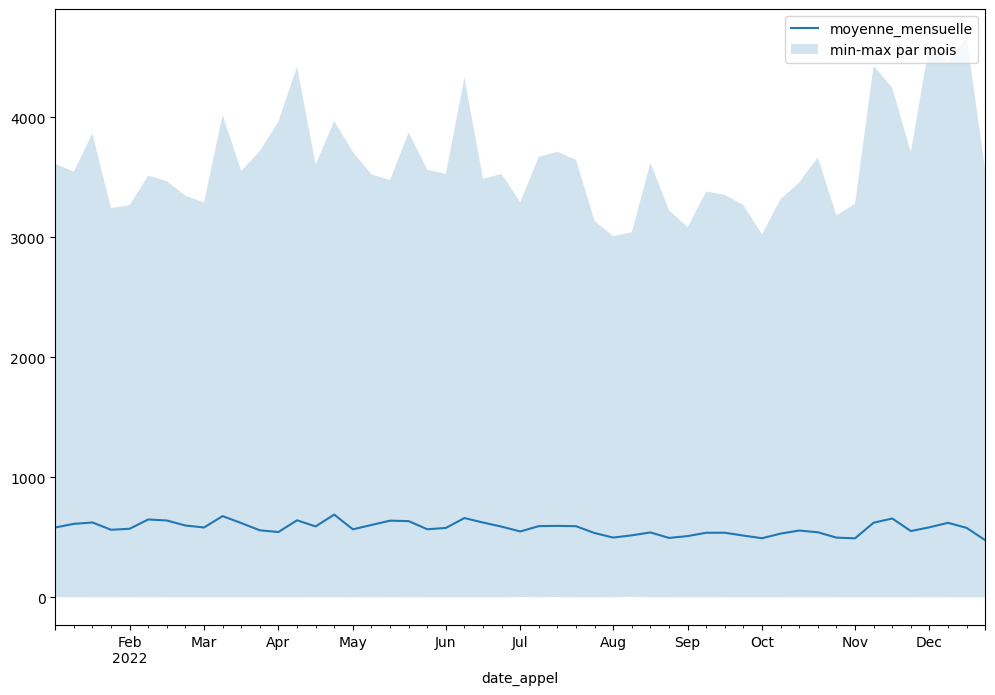

In [5]:
M= df_telephone.loc['2022','nombre_entrants_corrige'].resample('W').agg(["mean","std","min","max"])
plt.figure(figsize=(12,8))
M["mean"]["2022"].plot(label= "moyenne_mensuelle")
plt.fill_between(M.index, M["min"], M["max"], alpha=0.2 , label="min-max par mois")
plt.legend()
plt.show()

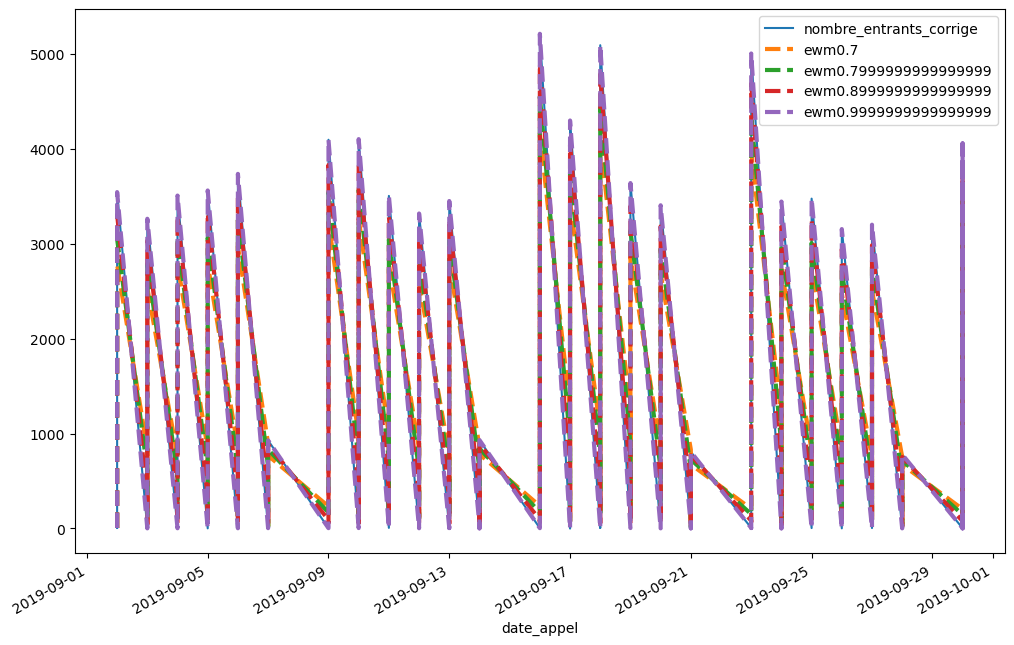

In [14]:
plt.figure(figsize=(12,8))
df_telephone.loc['2019-09','nombre_entrants_corrige'].plot()
# df_telephone.loc['2019-09','nombre_entrants_corrige'].rolling(window=365).mean().plot(label='non centre',lw=3, ls=':')
# df_telephone.loc['2019-09','nombre_entrants_corrige'].rolling(window=365
#                                                               ,center=True).mean().plot(label='centre',lw=3, ls=':')
for i in np.arange(0.7,1,0.1):
    df_telephone.loc['2019-09','nombre_entrants_corrige'].ewm(alpha=i).mean().plot(label=f'ewm{i}',lw=3, ls='--')
plt.legend()
plt.show()

In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [8]:
df_telephone_2021 = df_telephone.loc["2021":]

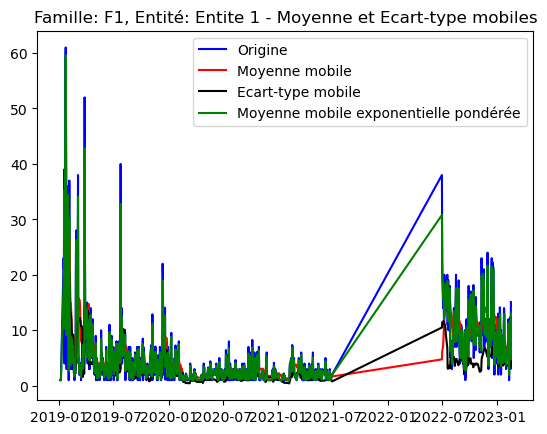

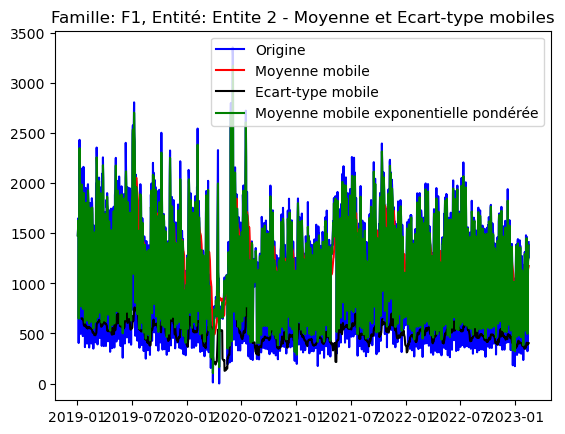

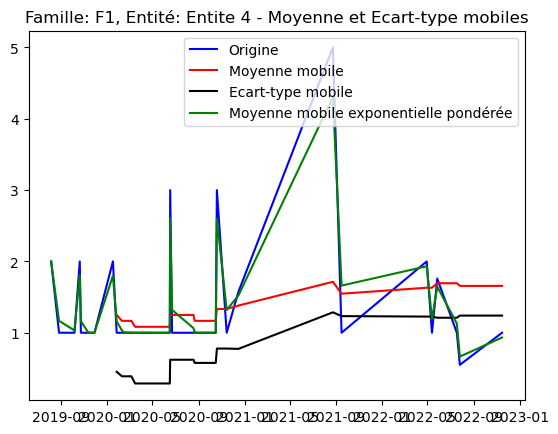

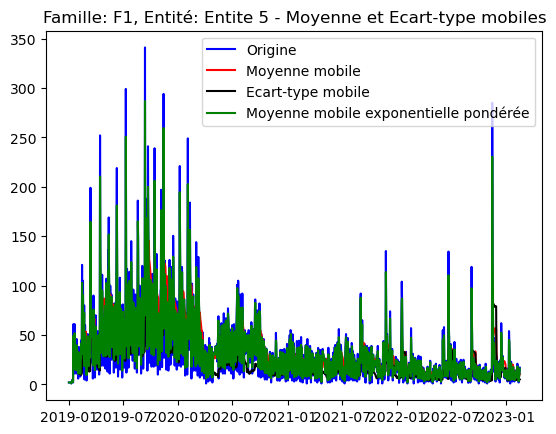

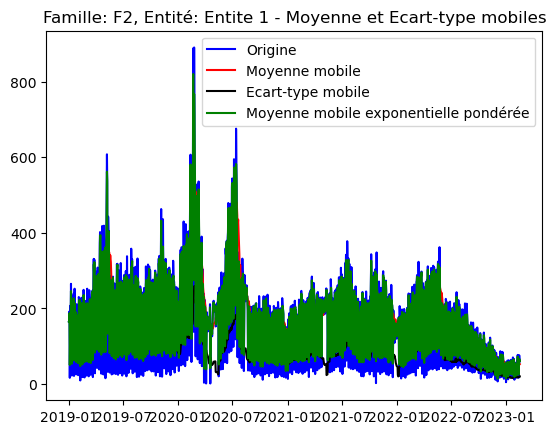

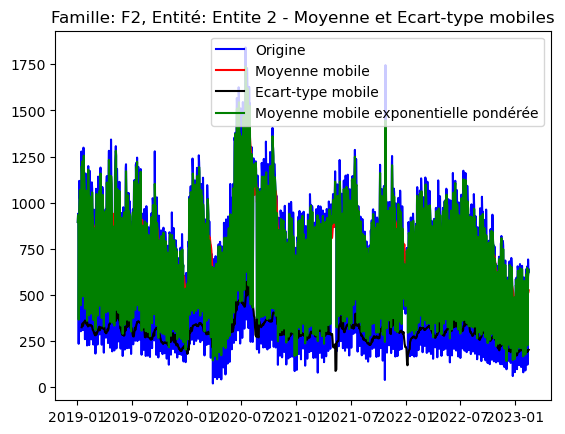

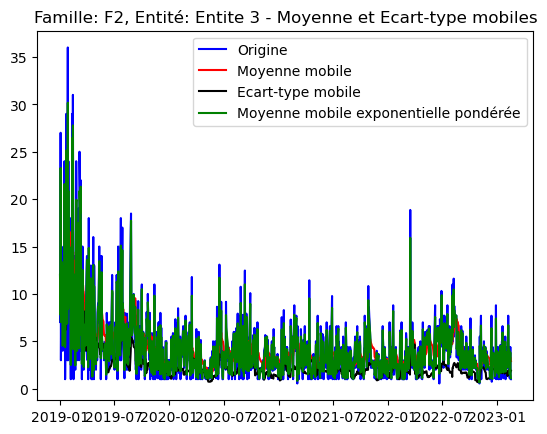

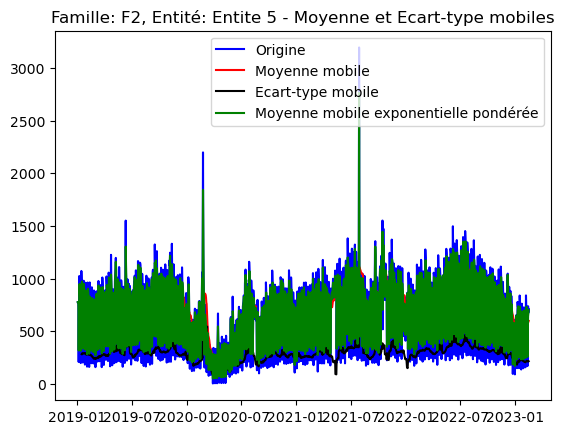

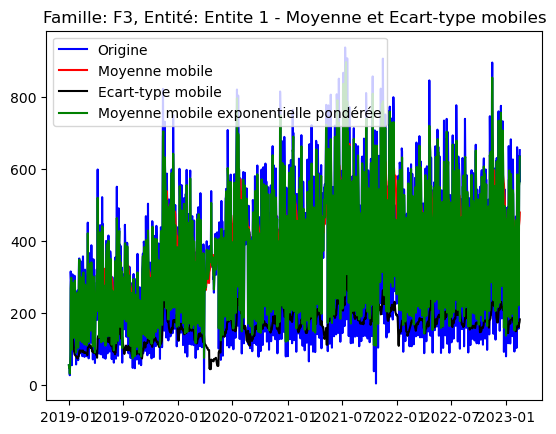

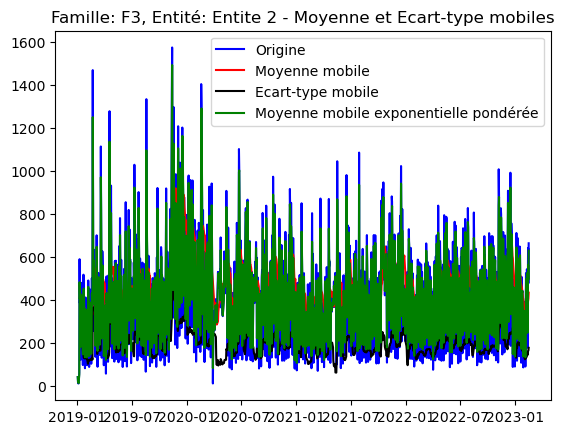

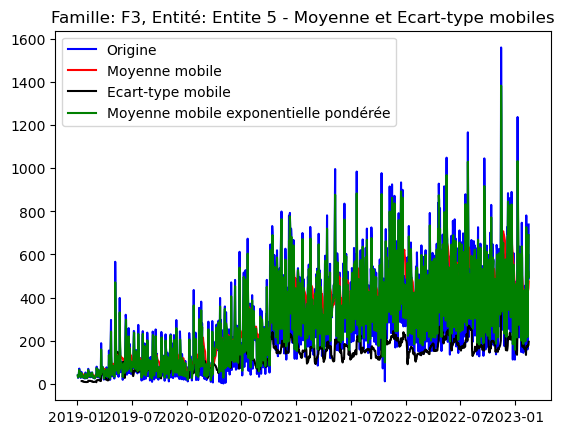

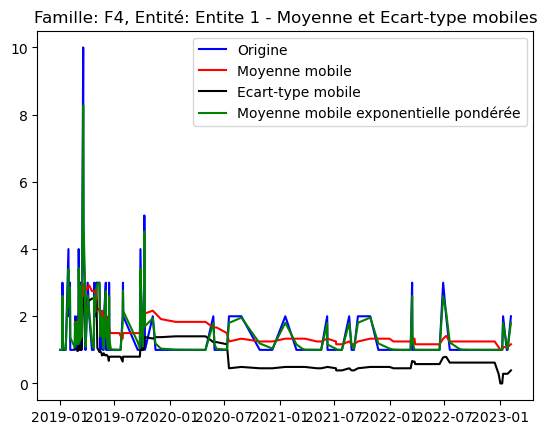

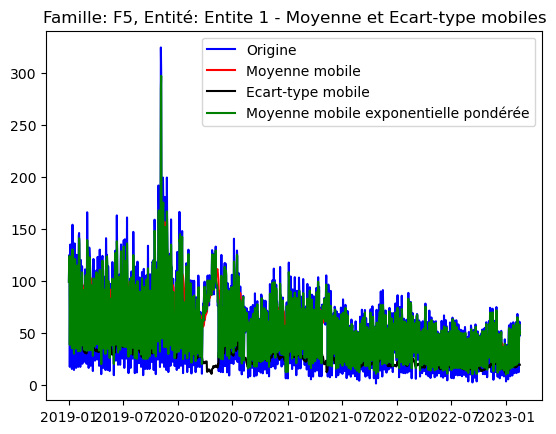

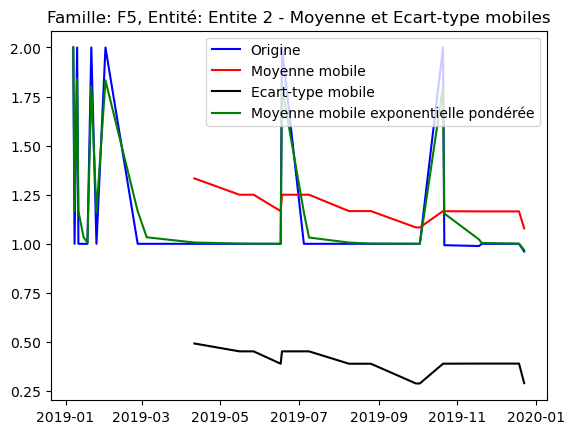

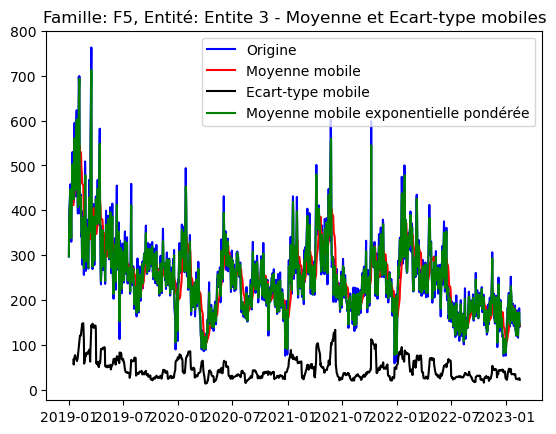

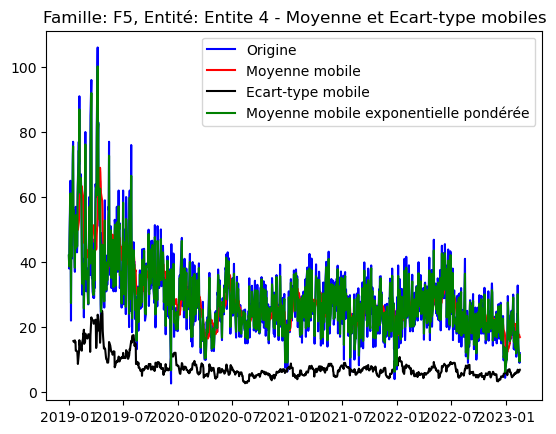

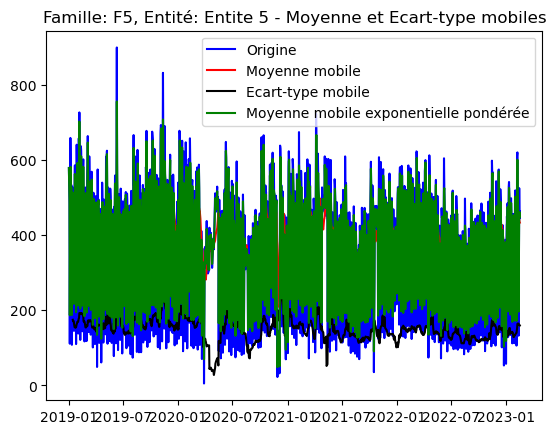

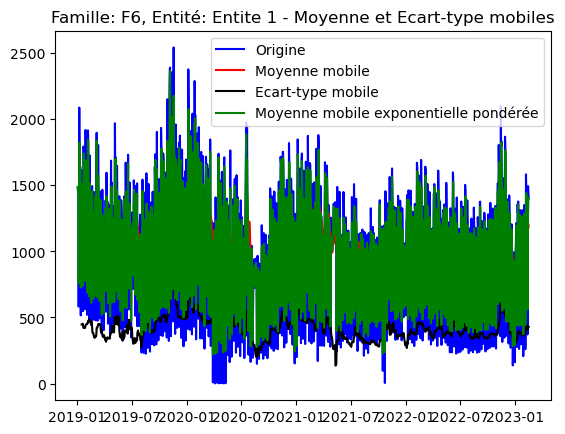

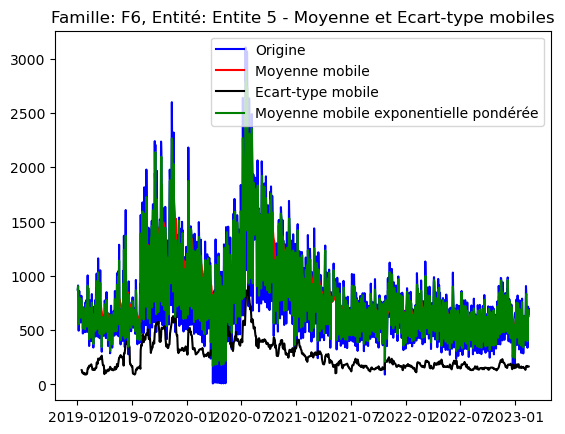

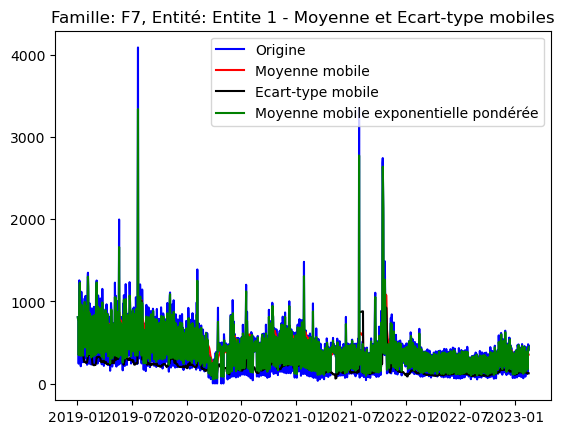

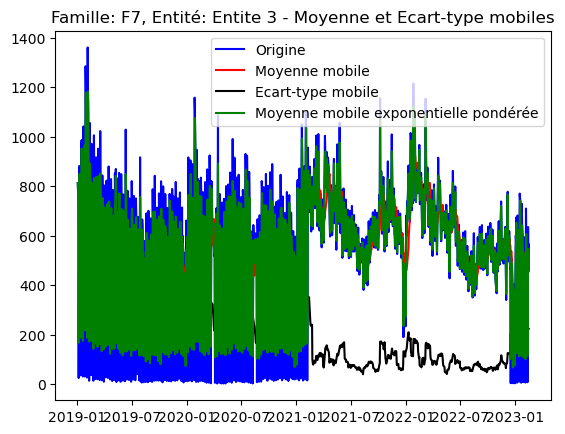

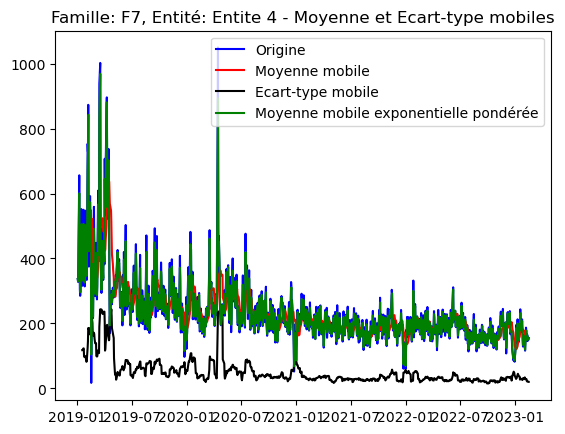

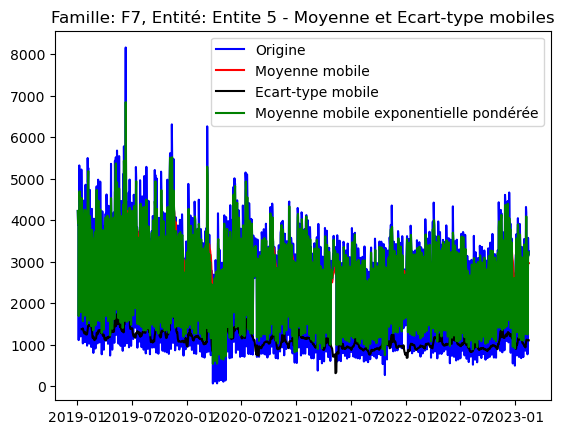

In [9]:


# Parcourir chaque famille_entite et tracer les graphiques de la moyenne mobile, de l'écart-type mobile et de la moyenne mobile exponentielle pondérée
for famille_entite, data_famille_entite in df_telephone.groupby(['famille', 'entite']):
    # Extraire les données spécifiques à la famille_entite
    serie = data_famille_entite['nombre_entrants_corrige']
    
    # Calculer la moyenne mobile sur une fenêtre de 12 périodes
    rolling_mean = serie.rolling(window=12).mean()
    
    # Calculer l'écart-type mobile sur une fenêtre de 12 périodes
    rolling_std = serie.rolling(window=12).std()
    
    # Calculer la moyenne mobile exponentielle pondérée avec un alpha spécifique (par exemple, 0.5)
    ewn_mean = serie.ewm(alpha=0.8).mean()
    
    # Tracer les graphiques de la série originale, de la moyenne mobile, de l'écart-type mobile et de la moyenne mobile exponentielle pondérée
    plt.figure()
    plt.plot(serie, color='blue', label='Origine')
    plt.plot(rolling_mean, color='red', label='Moyenne mobile')
    plt.plot(rolling_std, color='black', label='Ecart-type mobile')
    plt.plot(ewn_mean, color='green', label='Moyenne mobile exponentielle pondérée')
    plt.legend(loc='best')
    plt.title(f"Famille: {famille_entite[0]}, Entité: {famille_entite[1]} - Moyenne et Ecart-type mobiles")
    plt.show()


In [21]:
import pandas as pd

# Création d'une série temporelle avec une fréquence quotidienne
dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')

# Création des données pour la série temporelle (valeurs aléatoires pour l'exemple)
valeurs = [i for i in range(1, len(dates) + 1)]

# Création du DataFrame
df = pd.DataFrame({'date': dates, 'serie_temporelle': valeurs})

# Suppression des dimanches du DataFrame
df = df[df['date'].dt.dayofweek != 6]  # 6 représente le dimanche (0 pour lundi, 1 pour mardi, ..., 6 pour dimanche)

# Réinitialisation des index
df = df.reset_index(drop=True)

# Affichage du DataFrame
print(df)
import pandas as pd

# Utilisation du DataFrame précédemment créé avec la série temporelle sans les dimanches

# Différenciation saisonnière (hebdomadaire) pour supprimer la composante saisonnière
df['serie_diff_saison'] = df['serie_temporelle'].diff(periods=7)

# Sélection d'une date spécifique (par exemple, un lundi)
date_reference = pd.to_datetime('2023-08-02')  # Lundi, 2 janvier 2023

# Récupération de l'observation précédente de la période hebdomadaire
observation_precedente = df.loc[df['date'] == date_reference, 'serie_diff_saison'].values[0]

# Affichage des résultats
print("Date de référence :", date_reference)
print("Observation précédente :", observation_precedente)


          date  serie_temporelle
0   2023-01-02                 2
1   2023-01-03                 3
2   2023-01-04                 4
3   2023-01-05                 5
4   2023-01-06                 6
..         ...               ...
307 2023-12-26               360
308 2023-12-27               361
309 2023-12-28               362
310 2023-12-29               363
311 2023-12-30               364

[312 rows x 2 columns]
Date de référence : 2023-08-02 00:00:00
Observation précédente : 8.0
